In [155]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
from pathlib import Path
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score,f1_score


In [133]:
training_data = []
training_label = []

for dir_path in Path("Images/Train_224x224").glob("*"):
    label = dir_path.name

    for img_path in dir_path.glob("*.png"):
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        training_data.append(img)
        training_label.append(label)

In [134]:
training_data = np.array(training_data) / 255.0
training_label = np.array(training_label)

In [135]:
training_data.shape, training_label.shape

((622, 224, 224, 3), (622,))

In [136]:
testing_data = []
testing_label = []

for dir_path in Path("Images/Test_224x224").glob("*"):
    label = dir_path.name

    for img_path in dir_path.glob("*.png"):
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        testing_data.append(img)
        testing_label.append(label)

In [137]:
testing_data = np.array(testing_data) / 255.0
testing_label = np.array(testing_label)

In [138]:
testing_data.shape, testing_label.shape

((154, 224, 224, 3), (154,))

In [139]:
le = LabelEncoder()
train_labels_encoded = le.fit_transform(training_label)
test_labels_encoded = le.fit_transform(testing_label)

# Feature Extraction using VGG16

In [143]:
VGG16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in VGG16_model.layers:
	layer.trainable = False

In [144]:
training_data_feature = VGG16_model.predict(training_data)
X_train = training_data_feature.reshape(training_data_feature.shape[0], -1)

In [145]:
X_train.shape

(622, 25088)

In [146]:
testing_data_feature = VGG16_model.predict(testing_data)
X_test = testing_data_feature.reshape(testing_data_feature.shape[0], -1)

In [147]:
X_test.shape

(154, 25088)

# VGG16-DecisionTree

In [182]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, train_labels_encoded)

DecisionTreeClassifier()

In [184]:
prediction_DT = model_DT.predict(X_test)

In [185]:
prediction_DT = le.inverse_transform(prediction_DT)

In [186]:
print("Testing accuracy of VGG16-DT: ", accuracy_score(testing_label, prediction_DT))
print("Precision of VGG16-DT: ", precision_score(testing_label, prediction_DT, average='weighted'))
print("Recall of VGG16-DT:", recall_score(testing_label, prediction_DT, average='weighted'))
print("F1_Score of VGG16-DT:", f1_score(testing_label, prediction_DT, average='weighted'))

print("")
print("Classification Report of VGG16-DT \n", classification_report(testing_label, prediction_DT))

Testing accuracy of VGG16-DT:  0.9155844155844156
Precision of VGG16-DT:  0.9191094619666048
Recall of VGG16-DT: 0.9155844155844156
F1_Score of VGG16-DT: 0.9159946114491571

Classification Report of VGG16-DT 
               precision    recall  f1-score   support

      Benign       0.88      0.92      0.90        38
         Bot       0.94      0.94      0.94        17
  BruteForce       0.80      0.87      0.83        23
         DoS       0.96      0.84      0.90        32
    PortScan       0.96      1.00      0.98        27
   WebAttack       1.00      0.94      0.97        17

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



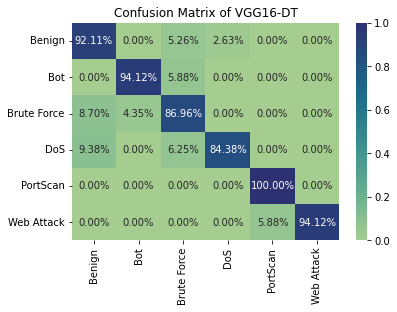

In [188]:
conf_mat_DT = confusion_matrix(testing_label, prediction_DT)
conf_mat_DT_percentage = conf_mat_DT.astype('float') / conf_mat_DT.sum(axis=1)[:, np.newaxis]

# Set up the target names and create a heatmap with percentage values
sns.heatmap(conf_mat_DT_percentage, annot=True, cmap="crest", xticklabels=target_names, yticklabels=target_names, fmt=".2%")
plt.title('Confusion Matrix of VGG16-DT')
plt.show()

# VGG16-GaussianNB

In [176]:
model_GNB = GaussianNB()
model_GNB.fit(X_train, train_labels_encoded)

GaussianNB()

In [177]:
prediction_GNB = model_GNB.predict(X_test)

In [178]:
prediction_GNB = le.inverse_transform(prediction_GNB)

In [179]:
print("Testing accuracy of VGG16-GNB: ", accuracy_score(testing_label, prediction_GNB))
print("Precision of VGG16-GNB: ", precision_score(testing_label, prediction_GNB, average='weighted'))
print("Recall of VGG16-GNB:", recall_score(testing_label, prediction_GNB, average='weighted'))
print("F1_Score of VGG16-GNB:", f1_score(testing_label, prediction_GNB, average='weighted'))

print("")
print("Classification Report of VGG16-GNB \n", classification_report(testing_label, prediction_GNB))

Testing accuracy of VGG16-GNB:  0.9090909090909091
Precision of VGG16-GNB:  0.9274812161019058
Recall of VGG16-GNB: 0.9090909090909091
F1_Score of VGG16-GNB: 0.9046794014539383

Classification Report of VGG16-GNB 
               precision    recall  f1-score   support

      Benign       0.76      1.00      0.86        38
         Bot       0.94      1.00      0.97        17
  BruteForce       1.00      0.57      0.72        23
         DoS       0.97      0.88      0.92        32
    PortScan       1.00      1.00      1.00        27
   WebAttack       1.00      1.00      1.00        17

    accuracy                           0.91       154
   macro avg       0.94      0.91      0.91       154
weighted avg       0.93      0.91      0.90       154



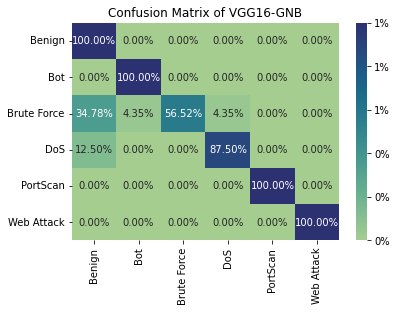

In [180]:
conf_mat_GNB = confusion_matrix(testing_label, prediction_GNB)
conf_mat_GNB_percentage = conf_mat_GNB.astype('float') / conf_mat_GNB.sum(axis=1)[:, np.newaxis]

# Set up the target names and create a heatmap with percentage values
sns.heatmap(conf_mat_GNB_percentage, annot=True, cmap="crest", xticklabels=target_names, yticklabels=target_names, fmt=".2%", cbar_kws={'format': '%.0f%%'})
plt.title('Confusion Matrix of VGG16-GNB')
plt.show()

# VGG16-kNN

In [191]:
model_kNN = KNeighborsClassifier()
model_kNN.fit(X_train, train_labels_encoded)

KNeighborsClassifier()

In [192]:
prediction_kNN = model_kNN.predict(X_test)

In [193]:
prediction_kNN = le.inverse_transform(prediction_kNN)

In [194]:
print("Testing accuracy of VGG16-kNN: ", accuracy_score(testing_label, prediction_kNN))
print("Precision of VGG16-kNN: ", precision_score(testing_label, prediction_kNN, average='weighted'))
print("Recall of VGG16-kNN:", recall_score(testing_label, prediction_kNN, average='weighted'))
print("F1_Score of VGG16-kNN:", f1_score(testing_label, prediction_kNN, average='weighted'))

print("")
print("Classification Report of VGG16-kNN \n", classification_report(testing_label, prediction_kNN))

Testing accuracy of VGG16-kNN:  0.9805194805194806
Precision of VGG16-kNN:  0.9827672327672328
Recall of VGG16-kNN: 0.9805194805194806
F1_Score of VGG16-kNN: 0.9806367937850039

Classification Report of VGG16-kNN 
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        38
         Bot       1.00      1.00      1.00        17
  BruteForce       0.88      1.00      0.94        23
         DoS       1.00      0.91      0.95        32
    PortScan       1.00      1.00      1.00        27
   WebAttack       1.00      1.00      1.00        17

    accuracy                           0.98       154
   macro avg       0.98      0.98      0.98       154
weighted avg       0.98      0.98      0.98       154



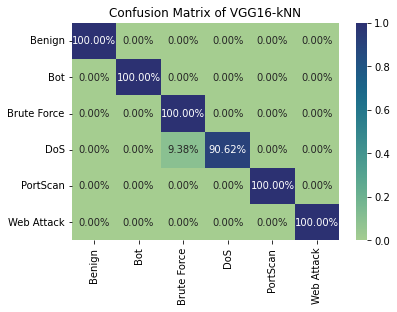

In [196]:
conf_mat_kNN = confusion_matrix(testing_label, prediction_kNN)
conf_mat_kNN_percentage = conf_mat_kNN.astype('float') / conf_mat_kNN.sum(axis=1)[:, np.newaxis]

# Set up the target names and create a heatmap with percentage values
sns.heatmap(conf_mat_kNN_percentage, annot=True, cmap="crest", xticklabels=target_names, yticklabels=target_names, fmt=".2%")
plt.title('Confusion Matrix of VGG16-kNN')
plt.show()

# VGG16-XgBoost

In [148]:
model_XGB = xgb.XGBClassifier()
model_XGB.fit(X_train, train_labels_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [149]:
prediction_XGB = model_XGB.predict(X_test)

In [152]:
prediction_XGB = le.inverse_transform(prediction_XGB)

In [153]:
accuracy_score(testing_label, prediction_XGB)

0.9935064935064936

In [156]:
print("Testing accuracy of Decision Tree: ", accuracy_score(testing_label, prediction_XGB))
print("Precision of Decision Tree: ", precision_score(testing_label, prediction_XGB, average='weighted'))
print("Recall of Decision Tree:", recall_score(testing_label, prediction_XGB, average='weighted'))
print("F1_Score of Decision Tree:", f1_score(testing_label, prediction_XGB, average='weighted'))

print("")
print("Classification Report of VGG16-XgBoost \n", classification_report(testing_label, prediction_XGB))

Testing accuracy of Decision Tree:  0.9935064935064936
Precision of Decision Tree:  0.9937770562770564
Recall of Decision Tree: 0.9935064935064936
F1_Score of Decision Tree: 0.9934771869007846

Classification Report of VGG16-XgBoost 
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        38
         Bot       1.00      1.00      1.00        17
  BruteForce       0.96      1.00      0.98        23
         DoS       1.00      1.00      1.00        32
    PortScan       1.00      1.00      1.00        27
   WebAttack       1.00      0.94      0.97        17

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



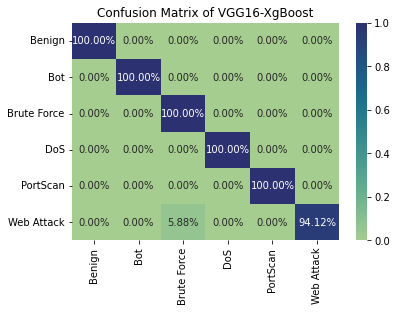

In [197]:
conf_mat_XGB = confusion_matrix(testing_label, prediction_XGB)
conf_mat_XGB_percentage = conf_mat_XGB.astype('float') / conf_mat_XGB.sum(axis=1)[:, np.newaxis]

# Set up the target names and create a heatmap with percentage values
sns.heatmap(conf_mat_XGB_percentage, annot=True, cmap="crest", xticklabels=target_names, yticklabels=target_names, fmt=".2%")
plt.title('Confusion Matrix of VGG16-XgBoost')
plt.show()